In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [86]:
cols=['fLength','fWidth','fSize','fConc','fConcl','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv("DataSets/ForML/magic04.data",names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConcl     fAsym  fM3Long  fM3Trans   
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027  \
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [87]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [88]:
df['class']=(df['class']=='g').astype(int) #converting g and h to 1's and 0's
df['class'].unique()

array([1, 0])

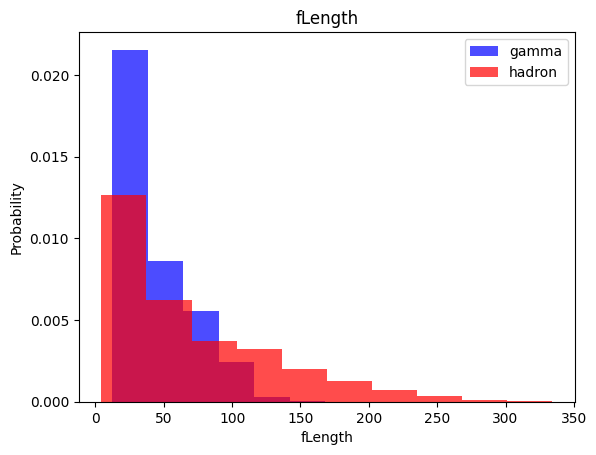

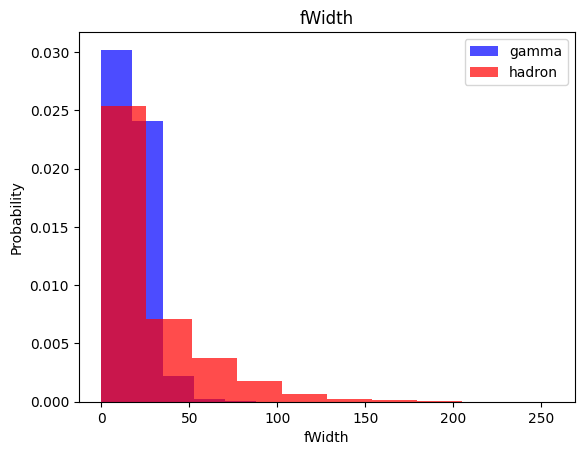

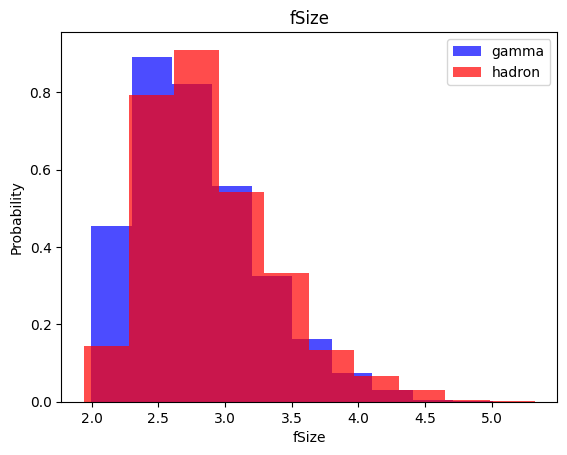

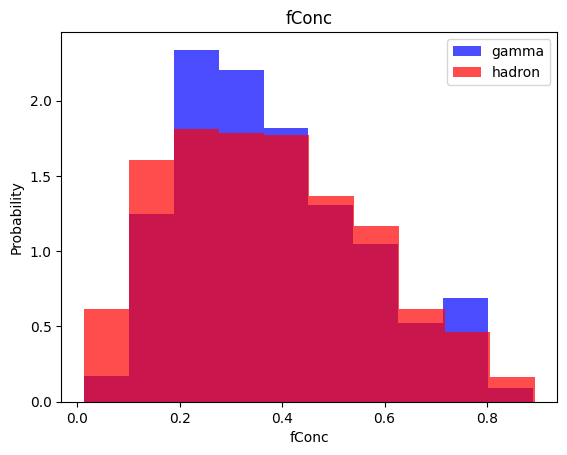

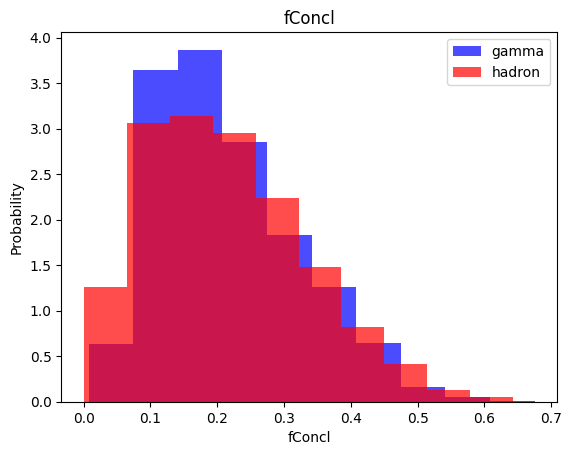

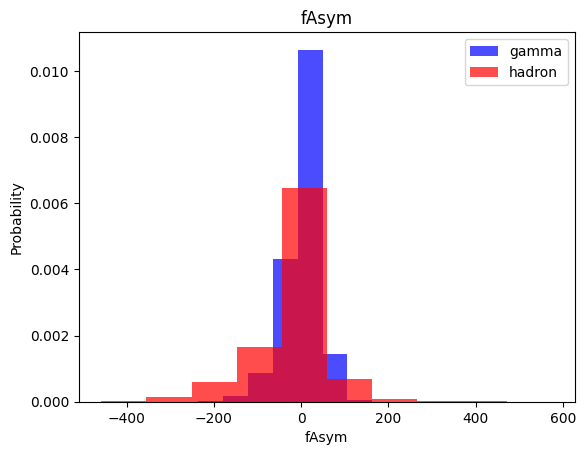

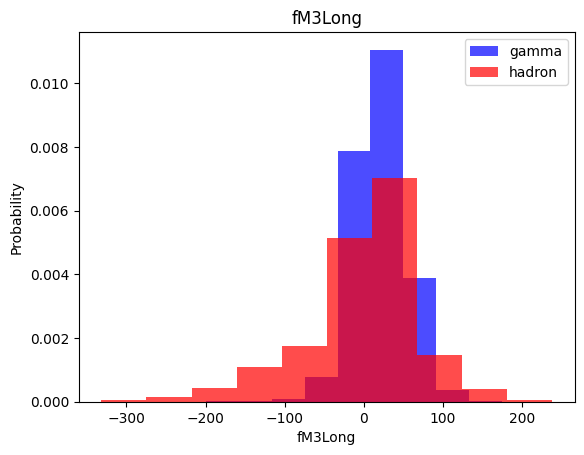

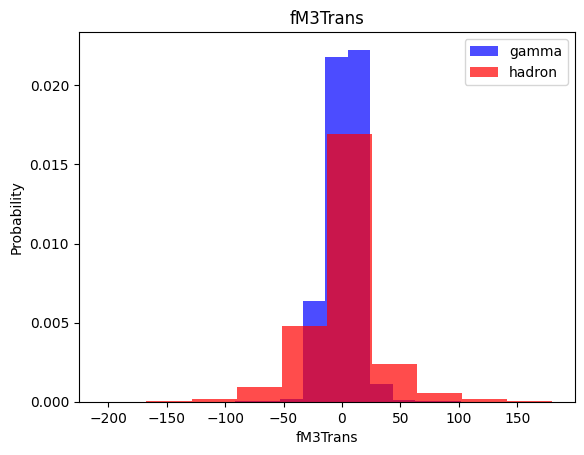

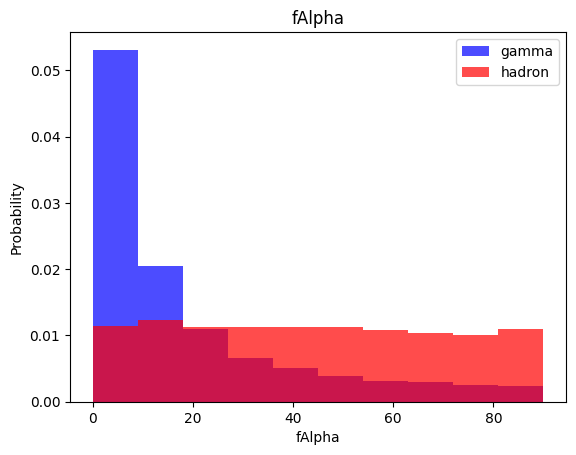

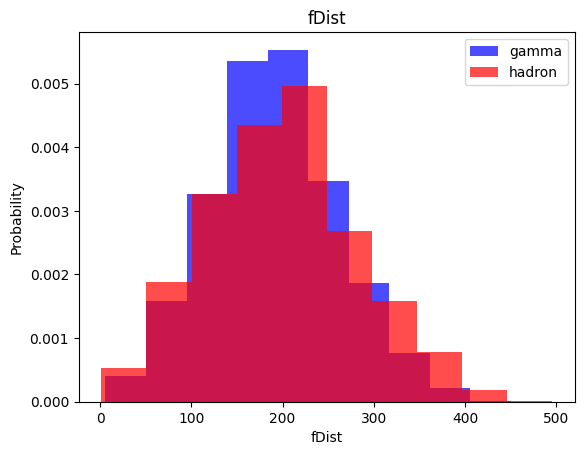

In [89]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

# Train Valid and Test datasets

In [90]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [91]:
def scale_dataset(dataframe,oversample=False):
    x=dataframe[dataframe.columns[:-1]].values
    y=dataframe[dataframe.columns[-1] ].values
    
    scaler=StandardScaler()
    x=scaler.fit_transform(x)
    
    if oversample:
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)
    
    data=np.hstack((x,np.reshape(y,(-1,1))))
    
    return data,x,y


In [92]:
train,x_train,y_train=scale_dataset(train,oversample=True)

In [93]:
len(y_train)

14832

In [94]:
sum(y_train==1)

7416

In [95]:
sum(y_train==0) #Evenly rebalanced

7416

In [96]:
valid,x_valid,y_valid=scale_dataset(valid,oversample=False)
test,x_test,y_test=scale_dataset(test,oversample=False)

KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [98]:
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [99]:
y_pred=knn_model.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1361
           1       0.83      0.89      0.86      2443

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Naive Bays Model

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
nb_model=GaussianNB()
nb_model=nb_model.fit(x_train,y_train)
y_pred=nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.50      1361
           1       0.73      0.90      0.80      2443

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804



Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
lg_model=LogisticRegression()
lg_model=lg_model.fit(x_train,y_train)


In [105]:
y_pred=lg_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1361
           1       0.84      0.82      0.83      2443

    accuracy                           0.78      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



Support Vector Machines(SVM)

In [106]:
from sklearn.svm import SVC

In [107]:
svm_model=SVC()
svm_model=svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1361
           1       0.89      0.89      0.89      2443

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



Neural Networks

In [110]:
import tensorflow as tf

In [124]:
def plot_history(history):
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()

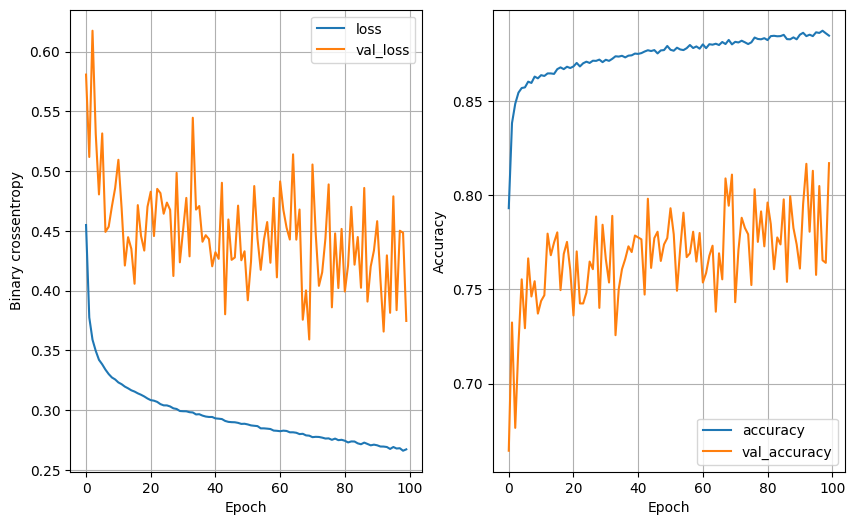

In [125]:
plot_history(history)

In [140]:

def train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):

    nn_model=tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
        tf.keras.layers.Dense(num_nodes,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
    history=nn_model.fit(
        x_train,y_train, epochs=epochs,batch_size=batch_size,validation_split=0.2,verbose=0
    )
    return nn_model,history

16 nodes,dropout 0,lr 0.1,batch size 32


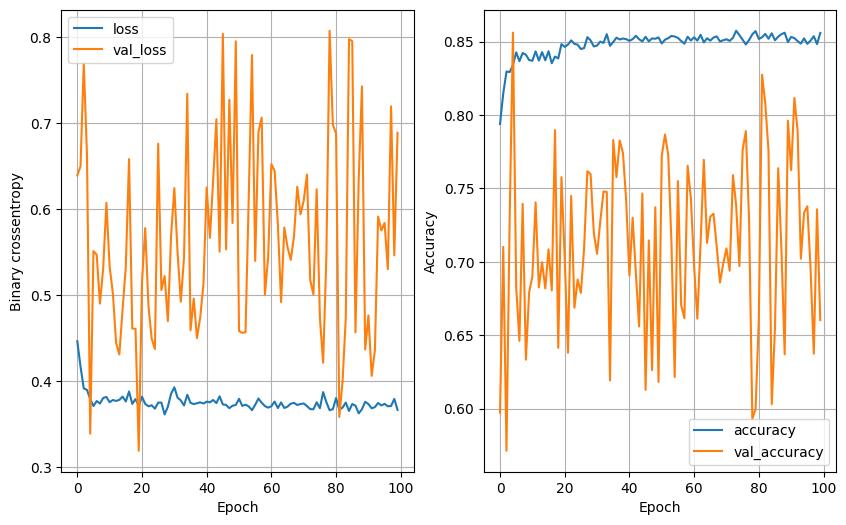

119/119 [==============================] - 0s 2ms/step - loss: 0.3469 - accuracy: 0.8601
16 nodes,dropout 0,lr 0.1,batch size 64


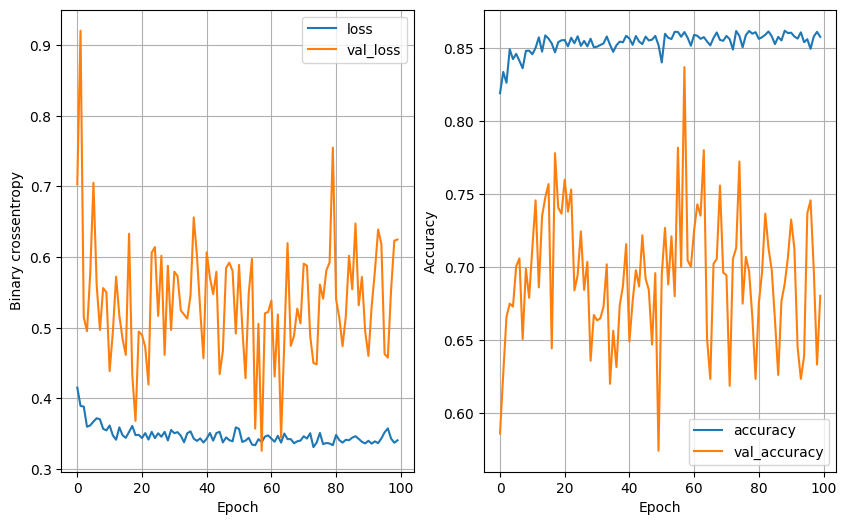

119/119 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8623
16 nodes,dropout 0,lr 0.1,batch size 128


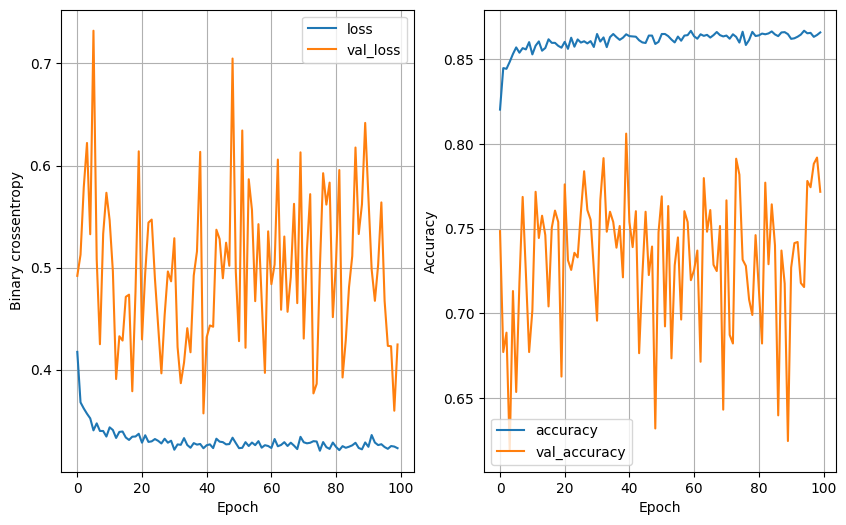

119/119 [==============================] - 0s 2ms/step - loss: 0.3472 - accuracy: 0.8699
16 nodes,dropout 0,lr 0.005,batch size 32


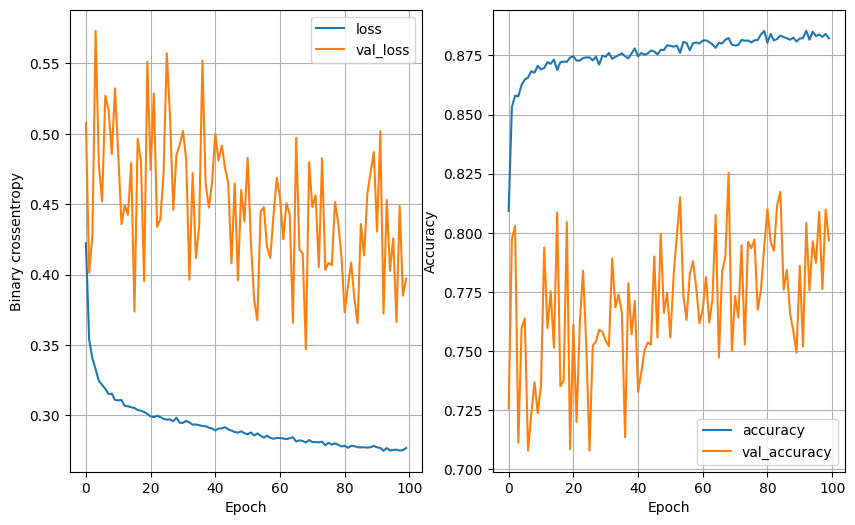

119/119 [==============================] - 0s 2ms/step - loss: 0.3262 - accuracy: 0.8722
16 nodes,dropout 0,lr 0.005,batch size 64


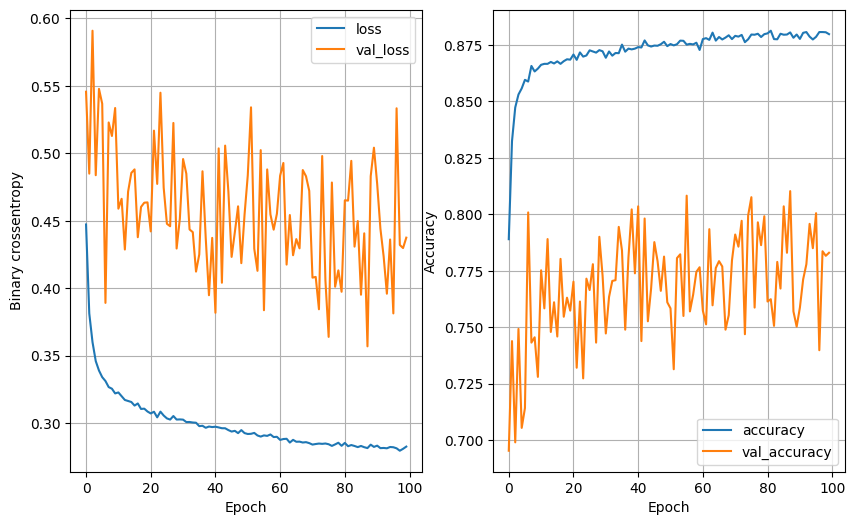

119/119 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8770
16 nodes,dropout 0,lr 0.005,batch size 128


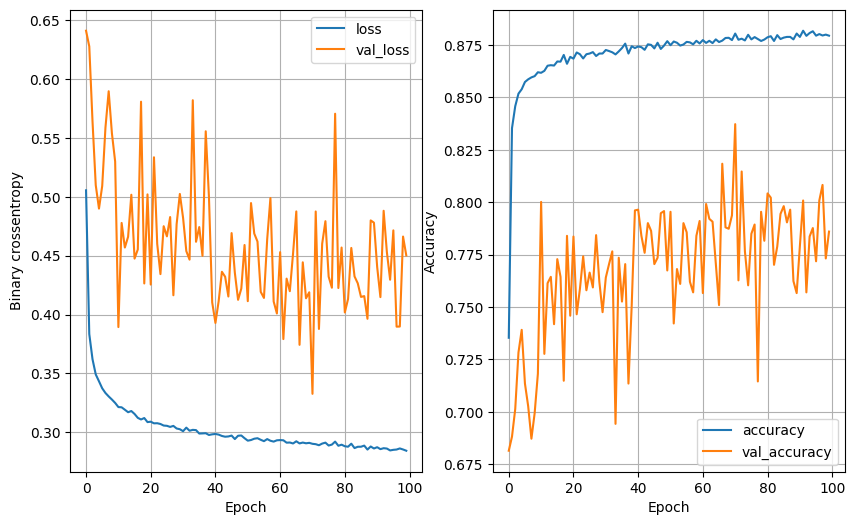

119/119 [==============================] - 0s 2ms/step - loss: 0.3143 - accuracy: 0.8754
16 nodes,dropout 0,lr 0.001,batch size 32


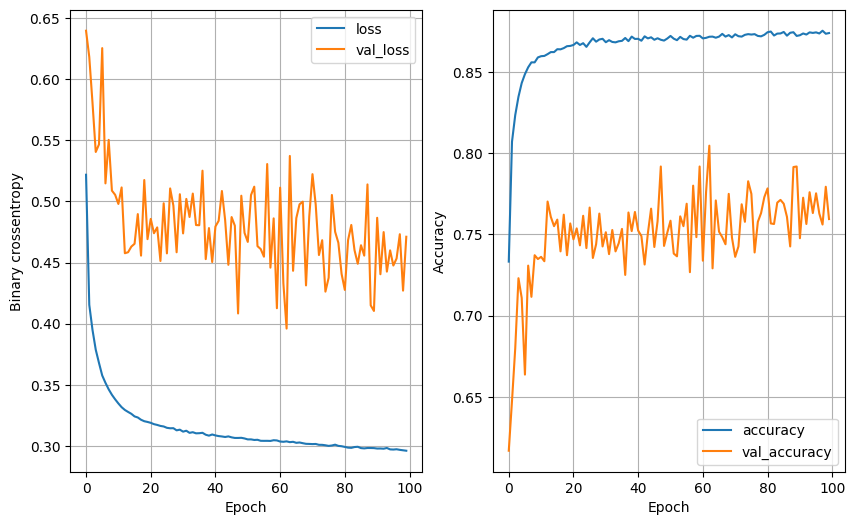

119/119 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8762
16 nodes,dropout 0,lr 0.001,batch size 64


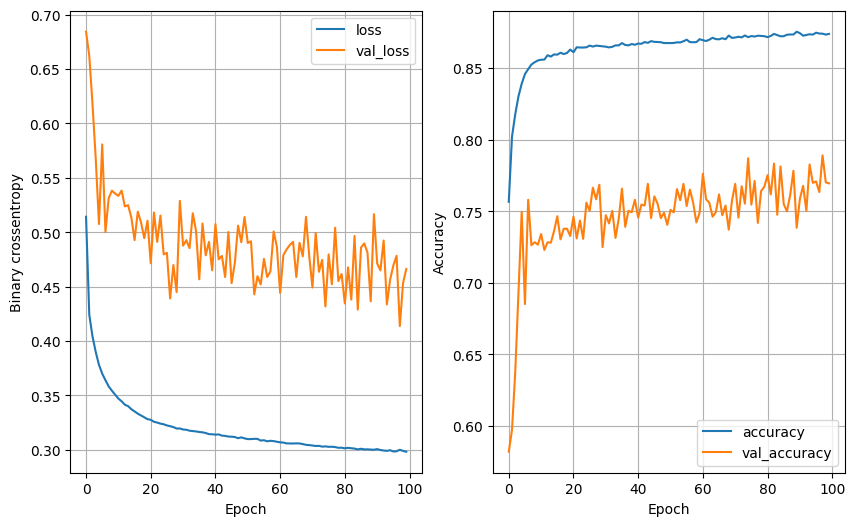

119/119 [==============================] - 0s 2ms/step - loss: 0.3067 - accuracy: 0.8743
16 nodes,dropout 0,lr 0.001,batch size 128


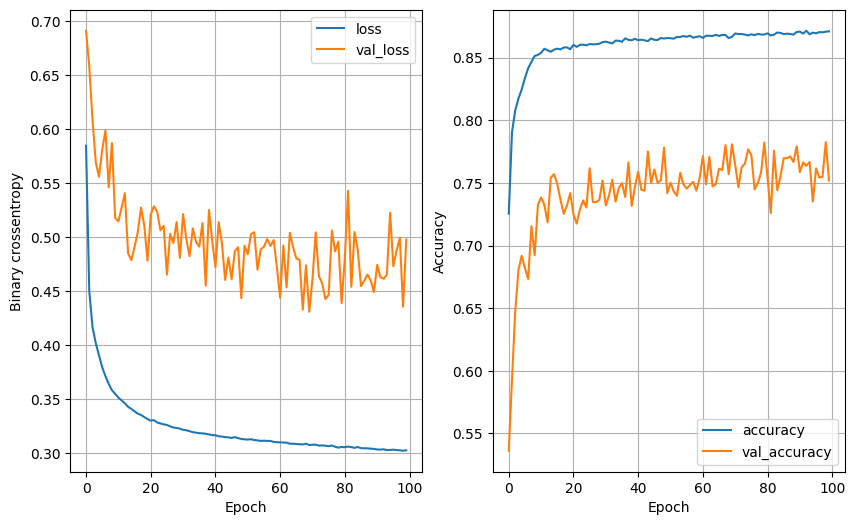

119/119 [==============================] - 0s 2ms/step - loss: 0.3103 - accuracy: 0.8715
16 nodes,dropout 0.2,lr 0.1,batch size 32


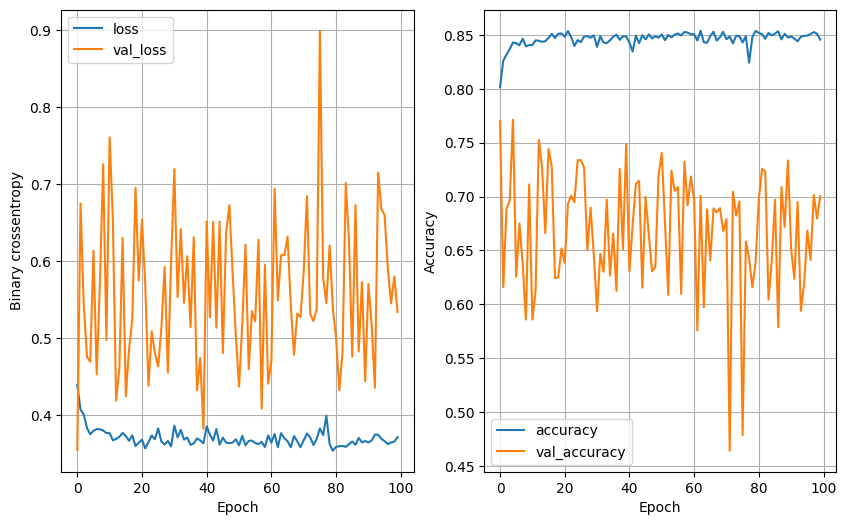

119/119 [==============================] - 0s 2ms/step - loss: 0.3362 - accuracy: 0.8688
16 nodes,dropout 0.2,lr 0.1,batch size 64


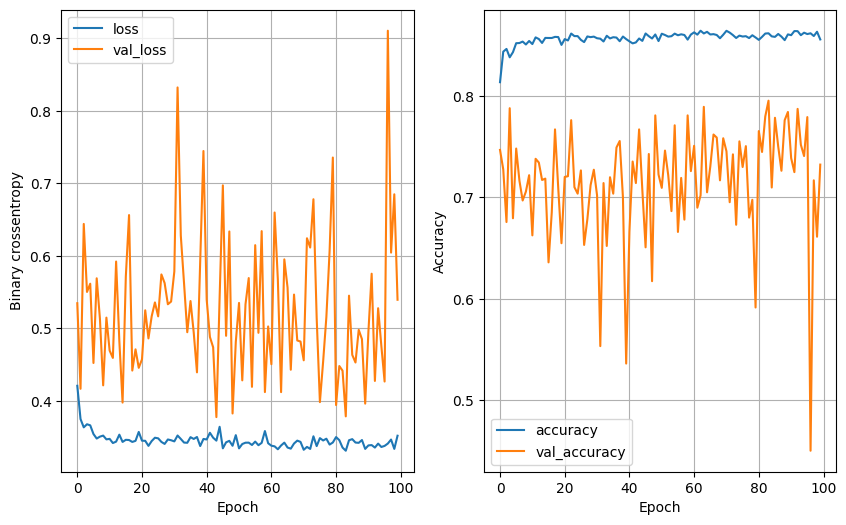

119/119 [==============================] - 0s 2ms/step - loss: 0.3603 - accuracy: 0.8699
16 nodes,dropout 0.2,lr 0.1,batch size 128


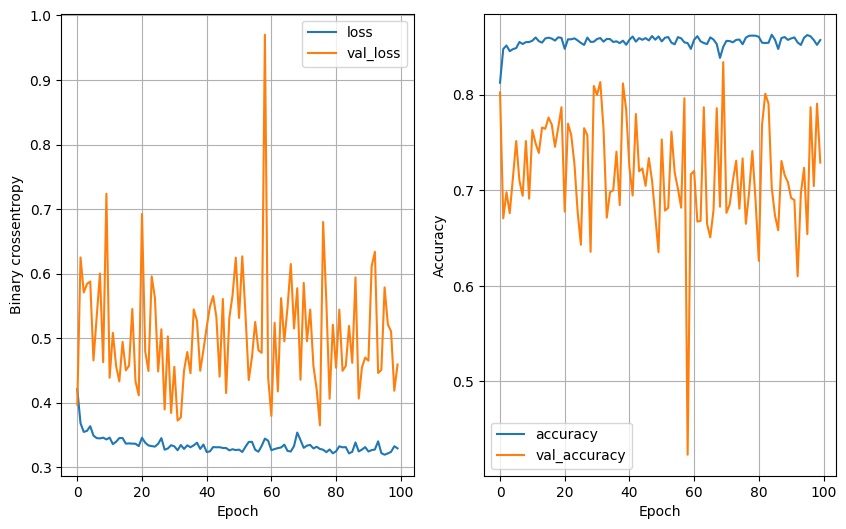

119/119 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8707
16 nodes,dropout 0.2,lr 0.005,batch size 32


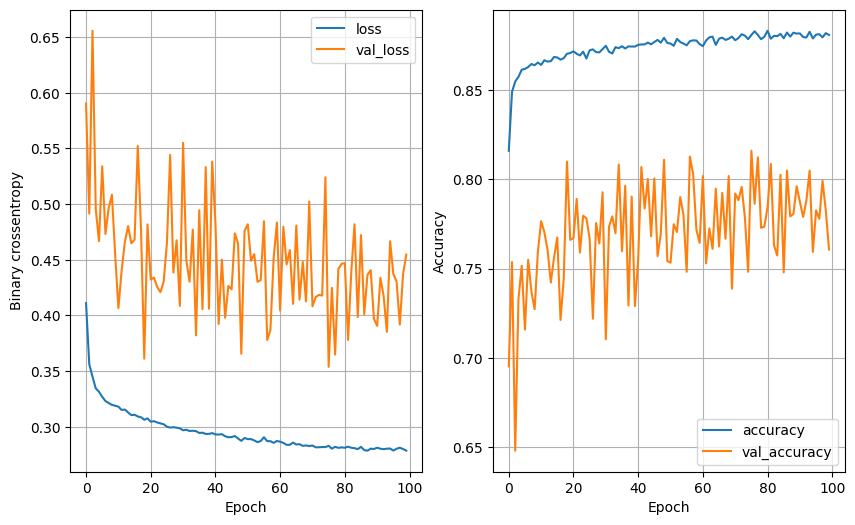

119/119 [==============================] - 0s 2ms/step - loss: 0.3092 - accuracy: 0.8720
16 nodes,dropout 0.2,lr 0.005,batch size 64


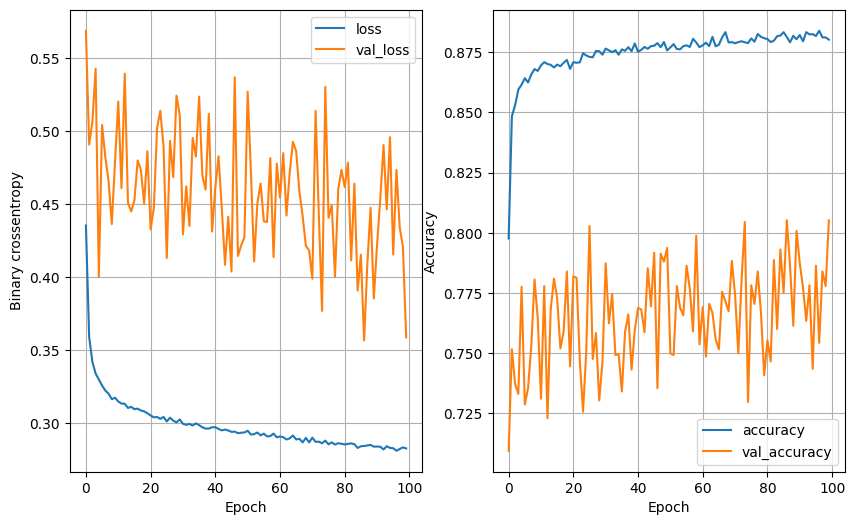

119/119 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8599
16 nodes,dropout 0.2,lr 0.005,batch size 128


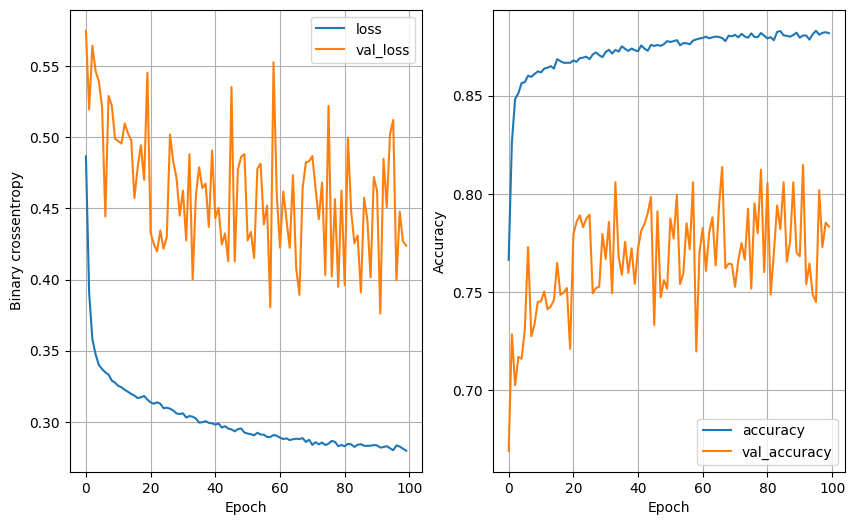

119/119 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8683
16 nodes,dropout 0.2,lr 0.001,batch size 32


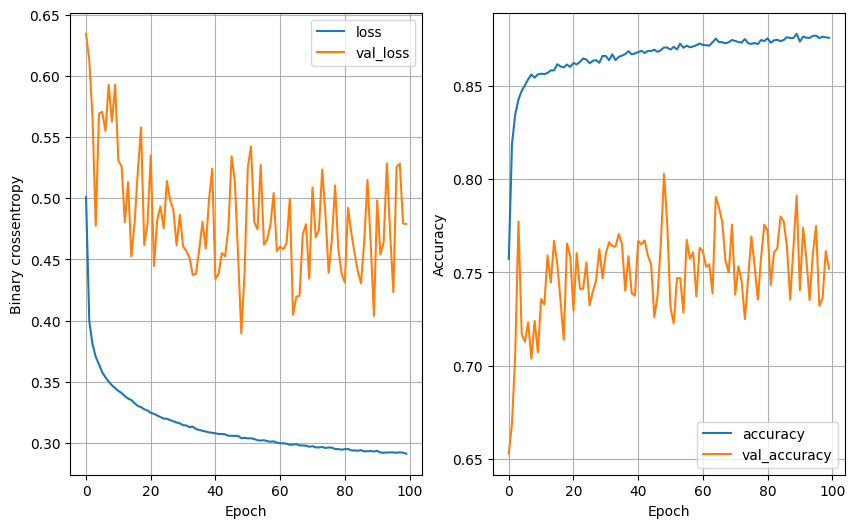

119/119 [==============================] - 0s 2ms/step - loss: 0.3226 - accuracy: 0.8678
16 nodes,dropout 0.2,lr 0.001,batch size 64


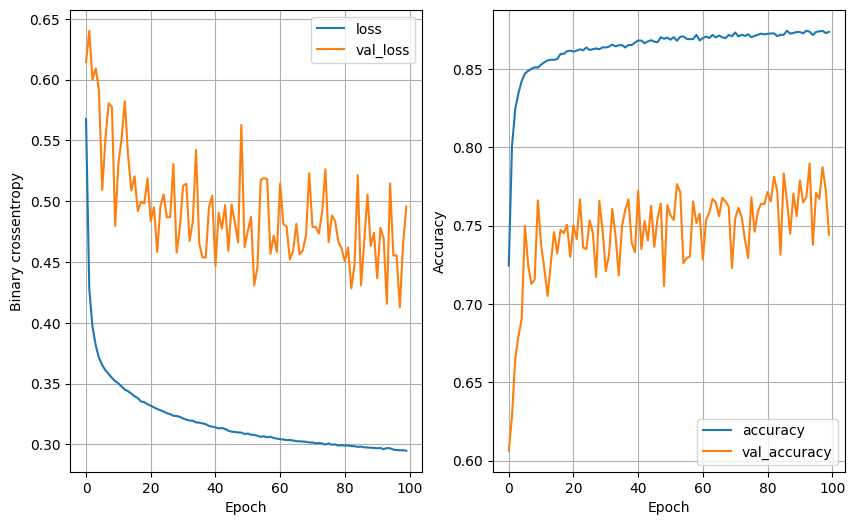

119/119 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8780
16 nodes,dropout 0.2,lr 0.001,batch size 128


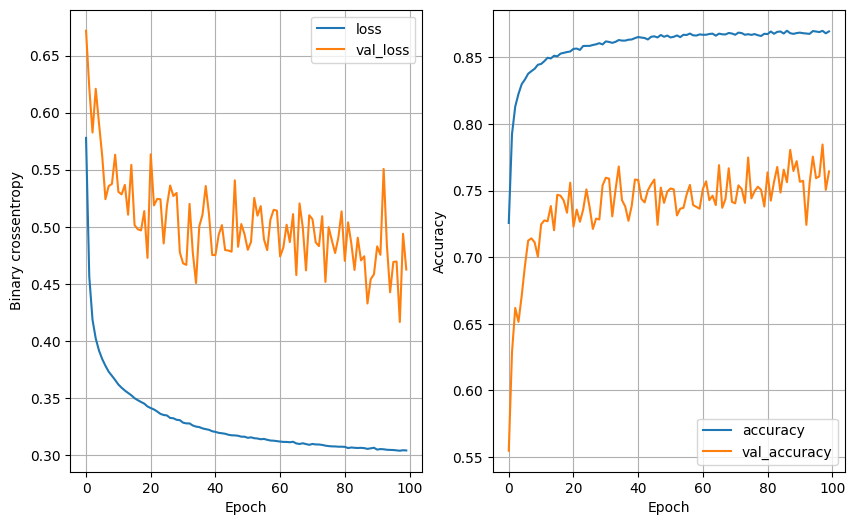

119/119 [==============================] - 0s 2ms/step - loss: 0.3106 - accuracy: 0.8696
32 nodes,dropout 0,lr 0.1,batch size 32


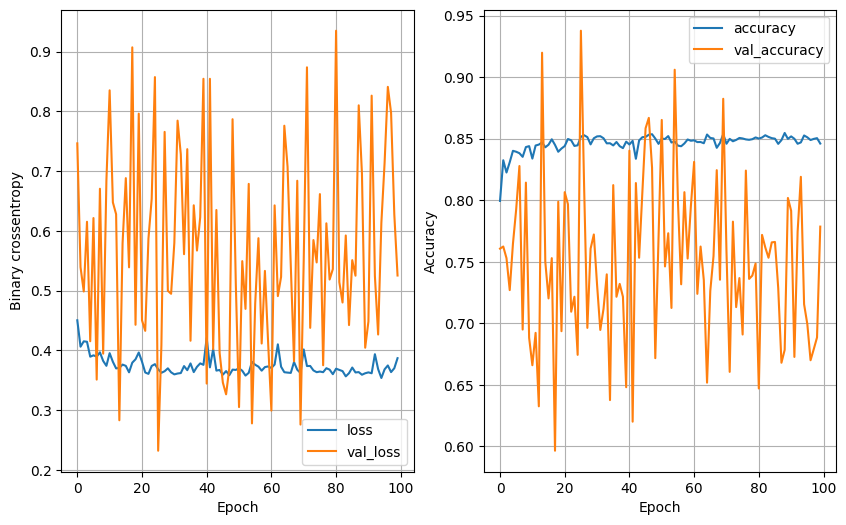

119/119 [==============================] - 0s 1ms/step - loss: 0.3398 - accuracy: 0.8604
32 nodes,dropout 0,lr 0.1,batch size 64


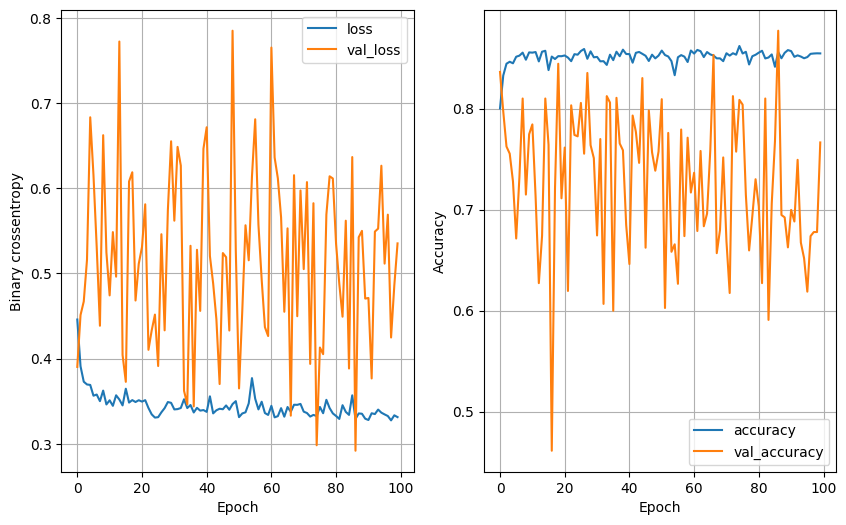

119/119 [==============================] - 0s 2ms/step - loss: 0.3832 - accuracy: 0.8502
32 nodes,dropout 0,lr 0.1,batch size 128


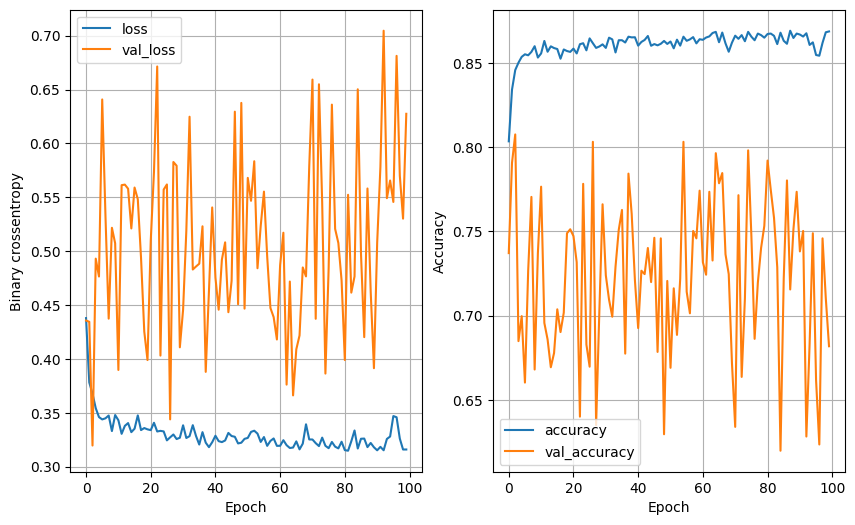

119/119 [==============================] - 0s 2ms/step - loss: 0.3326 - accuracy: 0.8704
32 nodes,dropout 0,lr 0.005,batch size 32


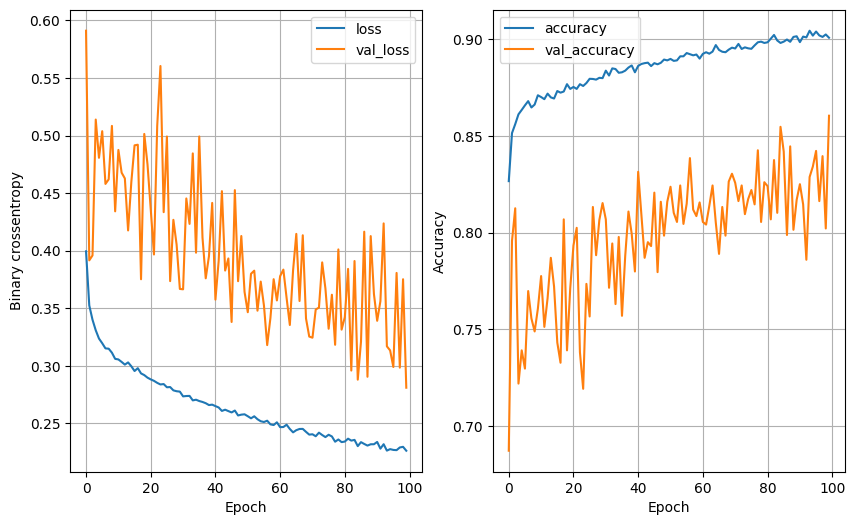

119/119 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8570
32 nodes,dropout 0,lr 0.005,batch size 64


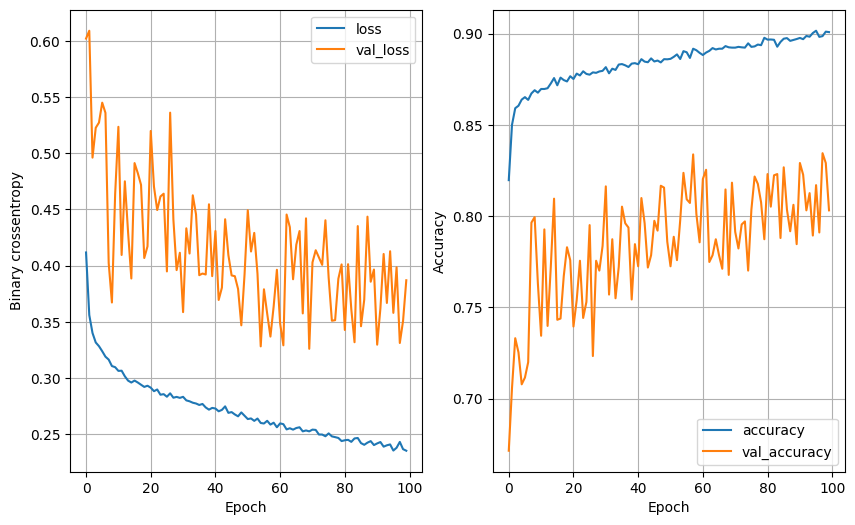

119/119 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8612
32 nodes,dropout 0,lr 0.005,batch size 128


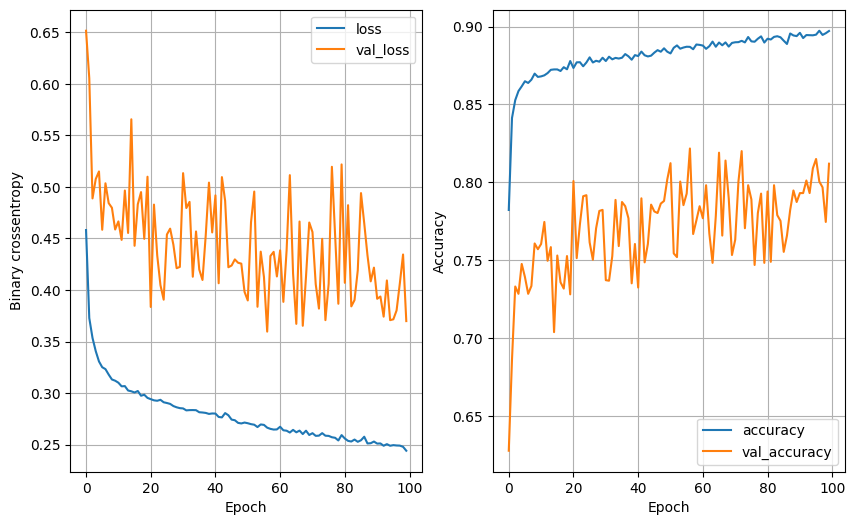

119/119 [==============================] - 0s 2ms/step - loss: 0.3521 - accuracy: 0.8686
32 nodes,dropout 0,lr 0.001,batch size 32


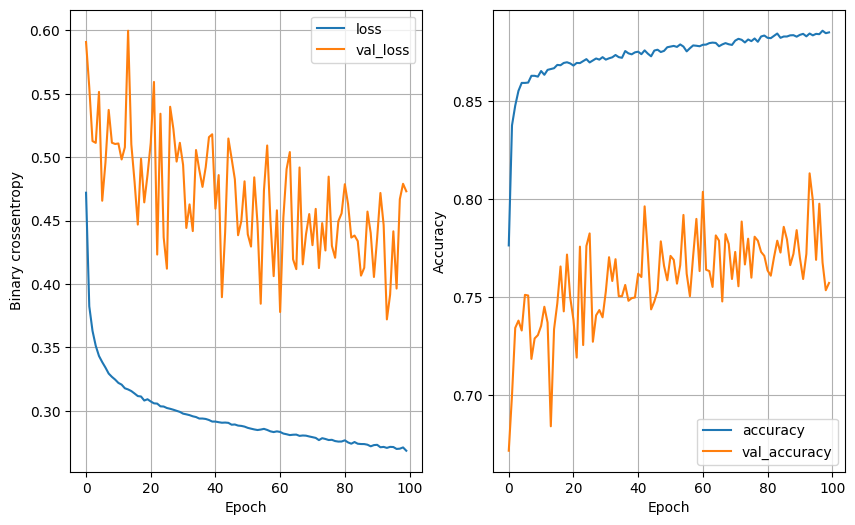

119/119 [==============================] - 0s 2ms/step - loss: 0.3159 - accuracy: 0.8728
32 nodes,dropout 0,lr 0.001,batch size 64


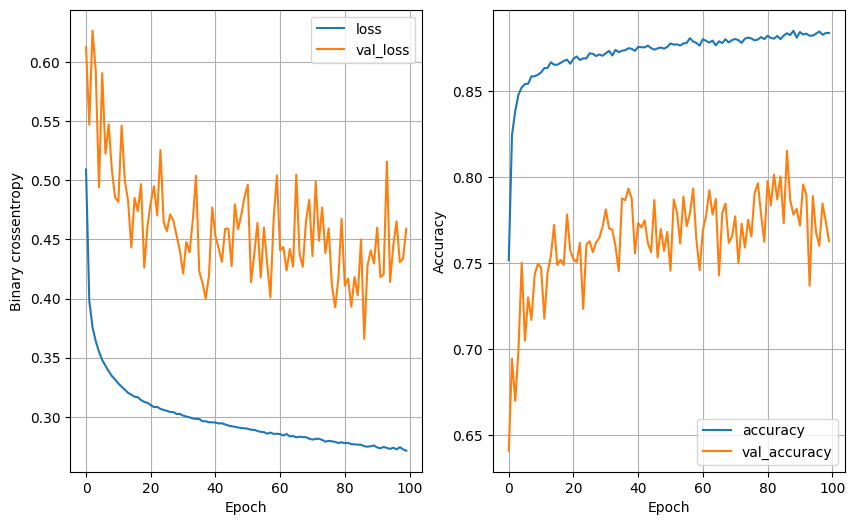

119/119 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8715
32 nodes,dropout 0,lr 0.001,batch size 128


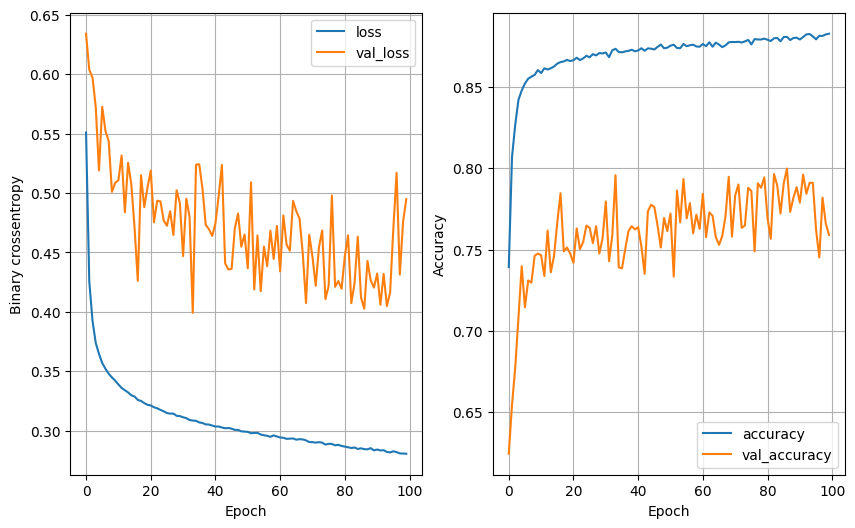

119/119 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.8764
32 nodes,dropout 0.2,lr 0.1,batch size 32


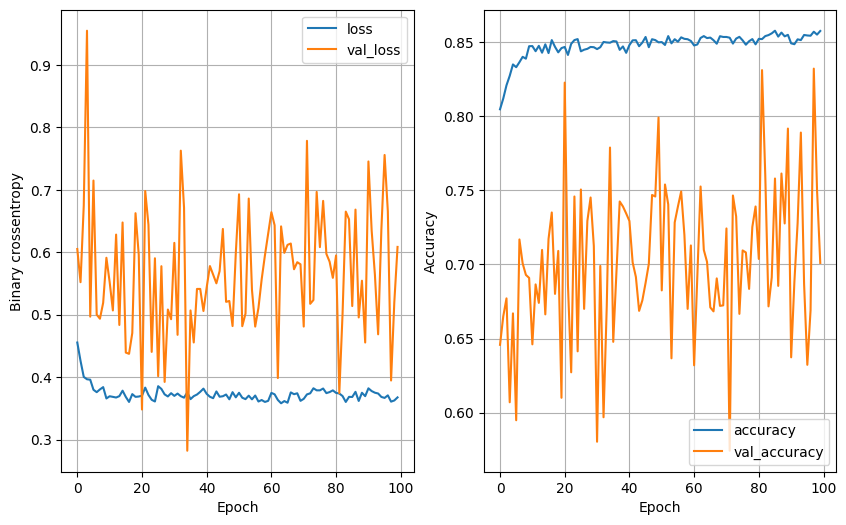

119/119 [==============================] - 0s 1ms/step - loss: 0.3663 - accuracy: 0.8667
32 nodes,dropout 0.2,lr 0.1,batch size 64


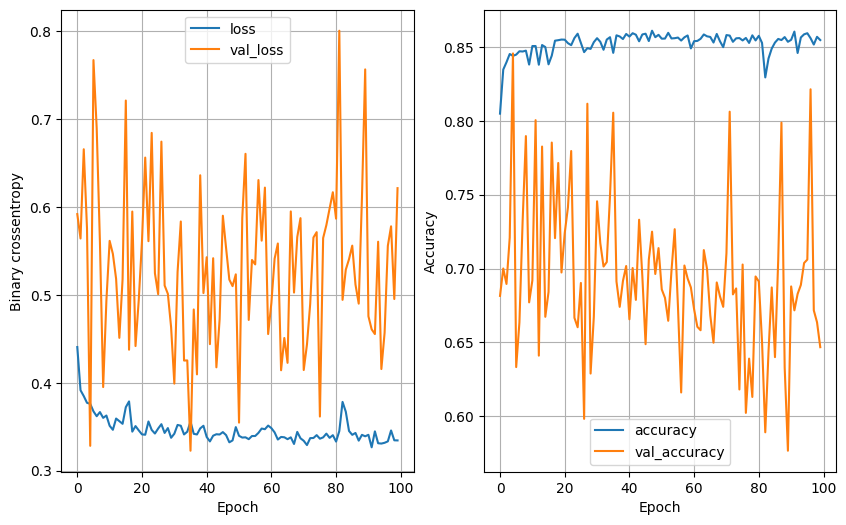

119/119 [==============================] - 0s 1ms/step - loss: 0.3298 - accuracy: 0.8554
32 nodes,dropout 0.2,lr 0.1,batch size 128


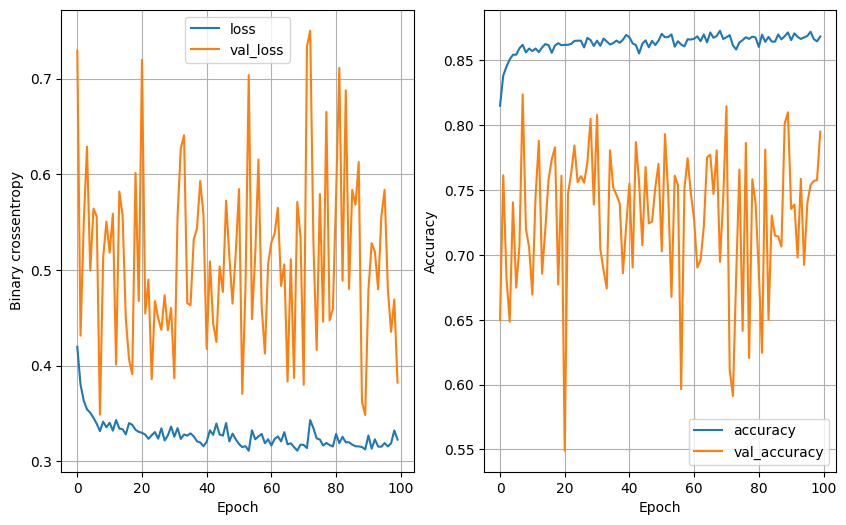

119/119 [==============================] - 0s 1ms/step - loss: 0.3510 - accuracy: 0.8712
32 nodes,dropout 0.2,lr 0.005,batch size 32


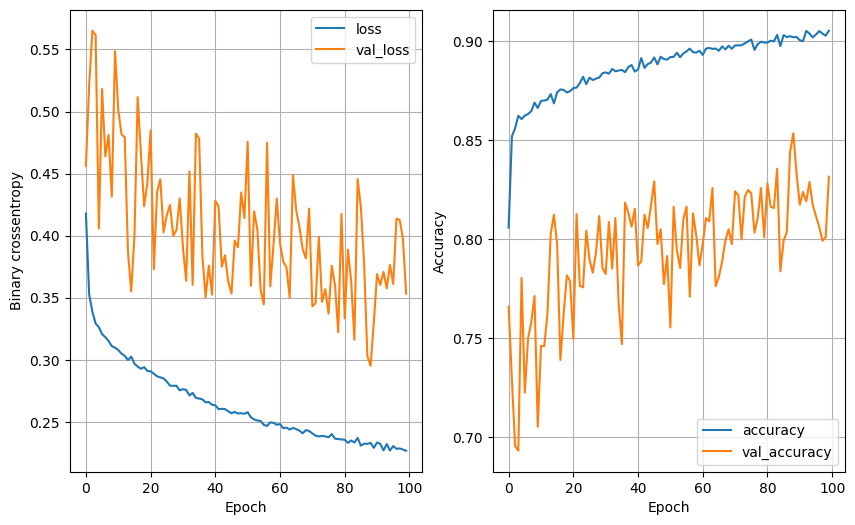

119/119 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8633
32 nodes,dropout 0.2,lr 0.005,batch size 64


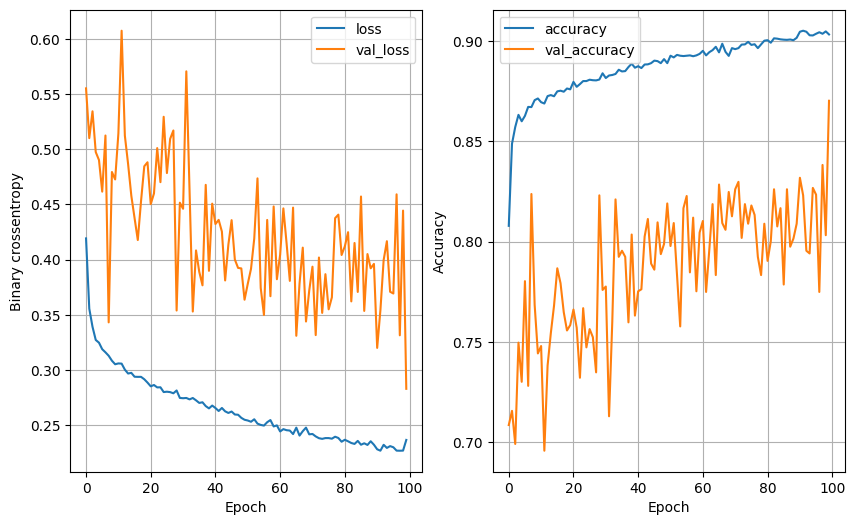

119/119 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8549
32 nodes,dropout 0.2,lr 0.005,batch size 128


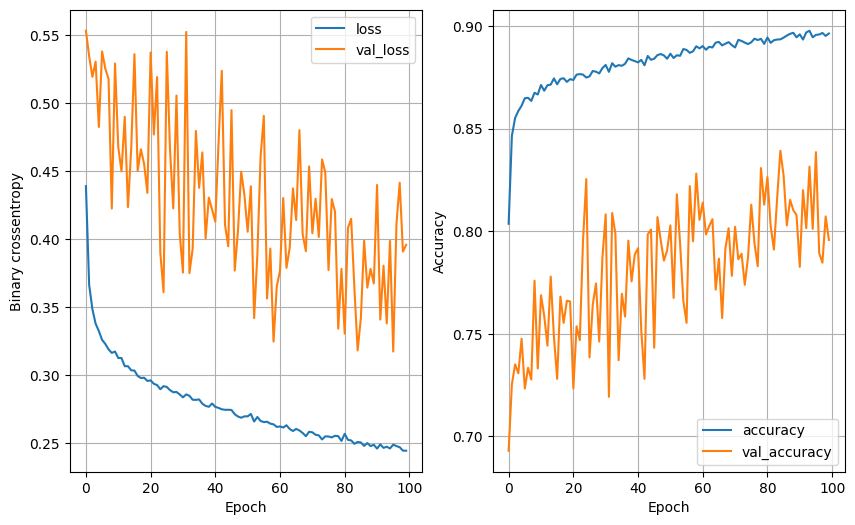

119/119 [==============================] - 0s 1ms/step - loss: 0.3259 - accuracy: 0.8709
32 nodes,dropout 0.2,lr 0.001,batch size 32


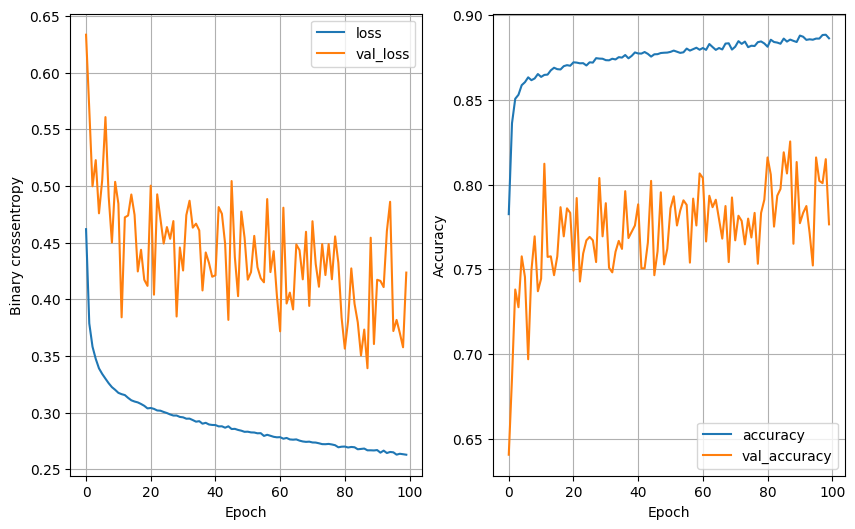

119/119 [==============================] - 0s 2ms/step - loss: 0.3190 - accuracy: 0.8775
32 nodes,dropout 0.2,lr 0.001,batch size 64


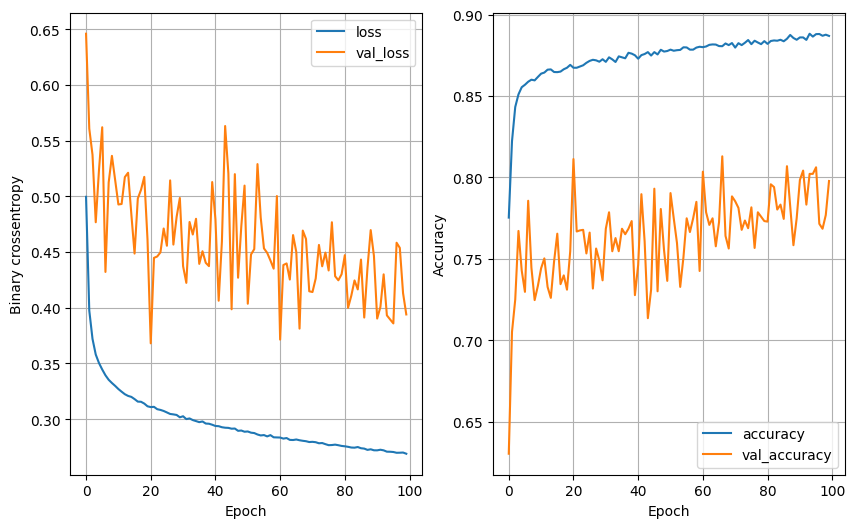

119/119 [==============================] - 0s 2ms/step - loss: 0.3240 - accuracy: 0.8712
32 nodes,dropout 0.2,lr 0.001,batch size 128


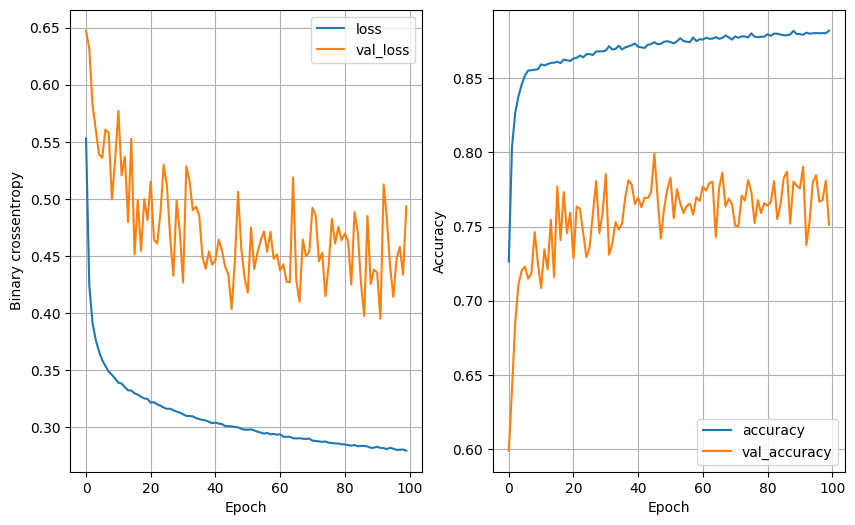

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8728
64 nodes,dropout 0,lr 0.1,batch size 32


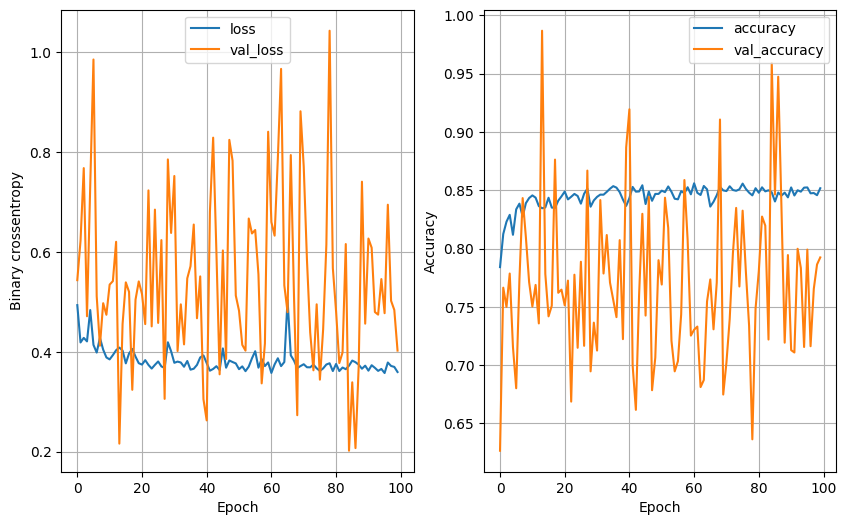

119/119 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8601
64 nodes,dropout 0,lr 0.1,batch size 64


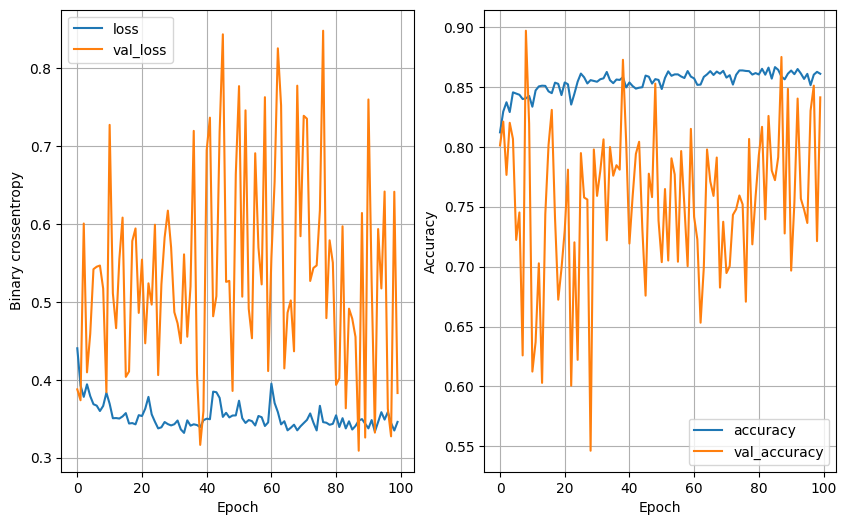

119/119 [==============================] - 0s 2ms/step - loss: 0.3585 - accuracy: 0.8544
64 nodes,dropout 0,lr 0.1,batch size 128


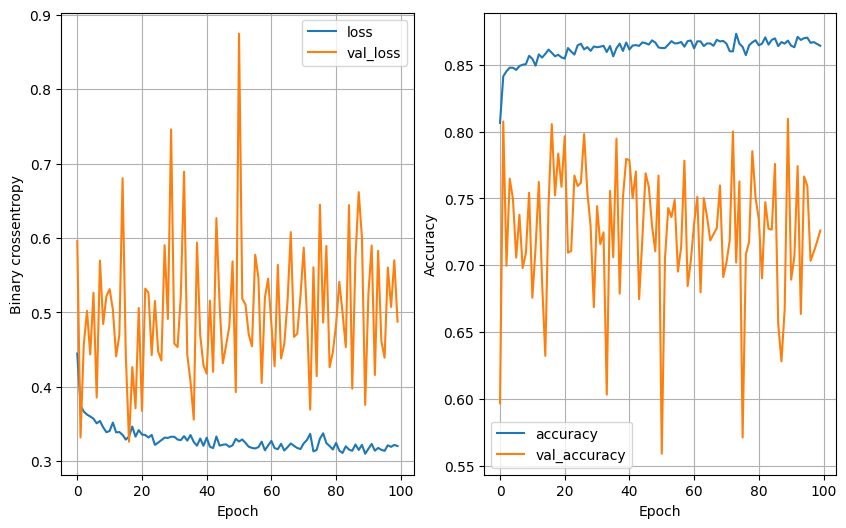

119/119 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8630
64 nodes,dropout 0,lr 0.005,batch size 32


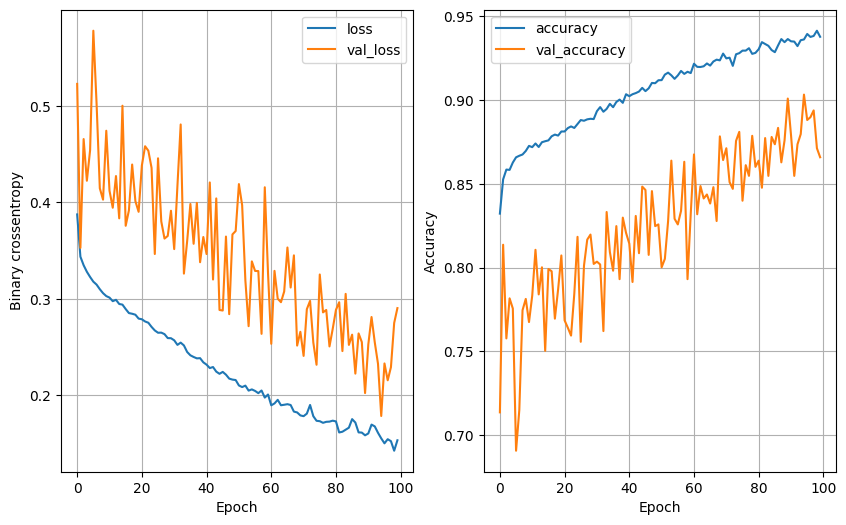

119/119 [==============================] - 1s 4ms/step - loss: 0.6150 - accuracy: 0.8575
64 nodes,dropout 0,lr 0.005,batch size 64


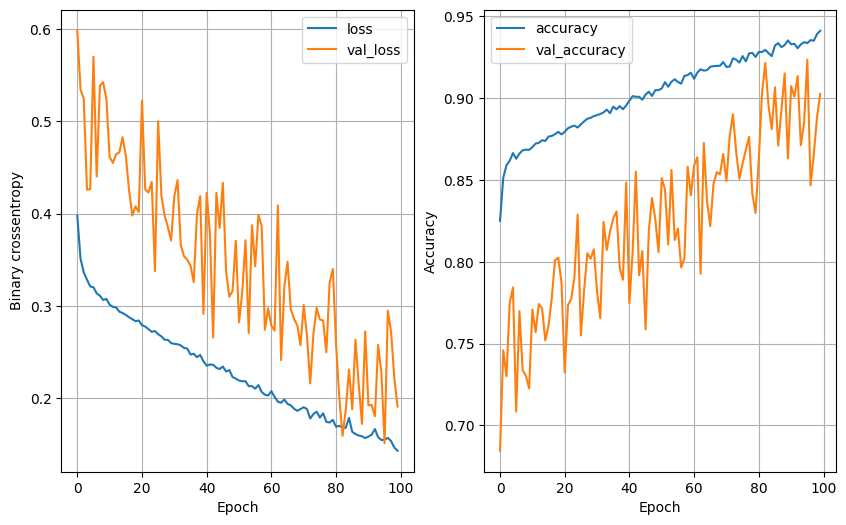

119/119 [==============================] - 0s 3ms/step - loss: 0.6527 - accuracy: 0.8318
64 nodes,dropout 0,lr 0.005,batch size 128


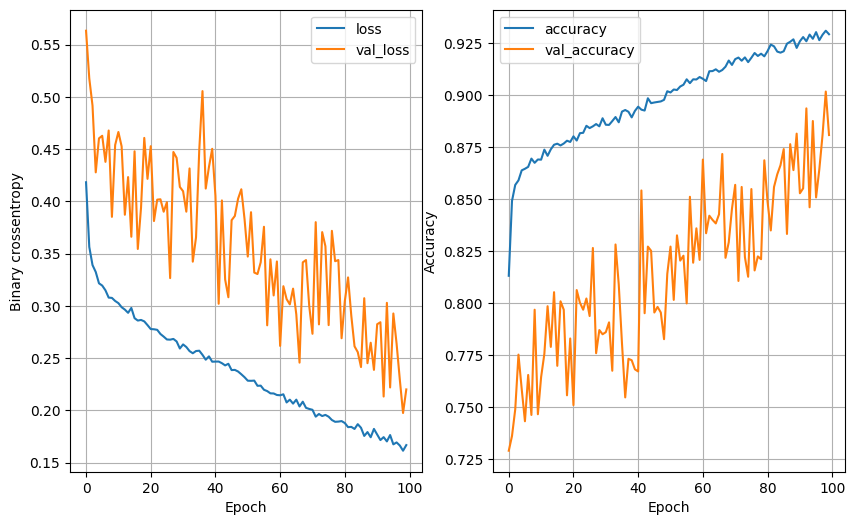

119/119 [==============================] - 0s 2ms/step - loss: 0.5042 - accuracy: 0.8452
64 nodes,dropout 0,lr 0.001,batch size 32


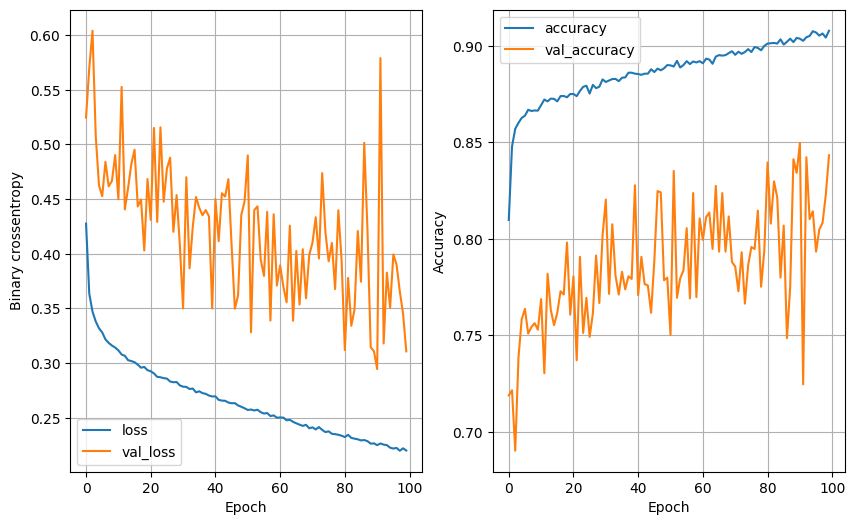

119/119 [==============================] - 1s 4ms/step - loss: 0.3750 - accuracy: 0.8646
64 nodes,dropout 0,lr 0.001,batch size 64


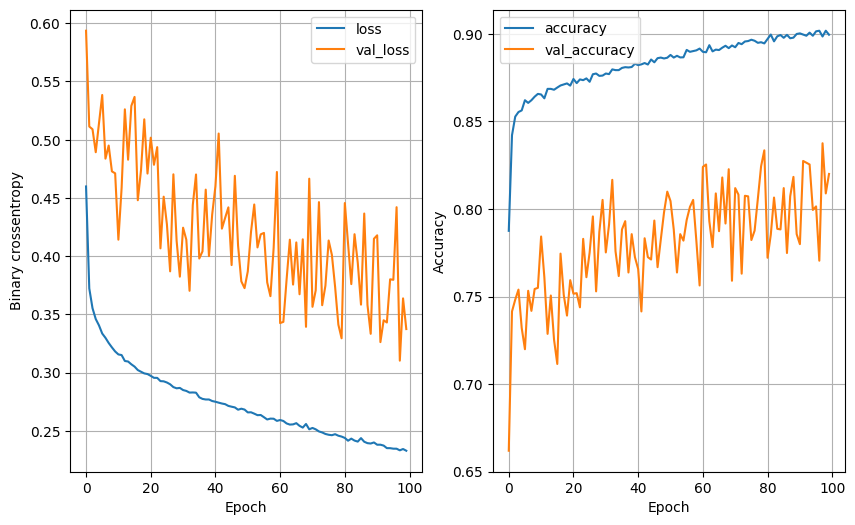

119/119 [==============================] - 0s 2ms/step - loss: 0.3445 - accuracy: 0.8696
64 nodes,dropout 0,lr 0.001,batch size 128


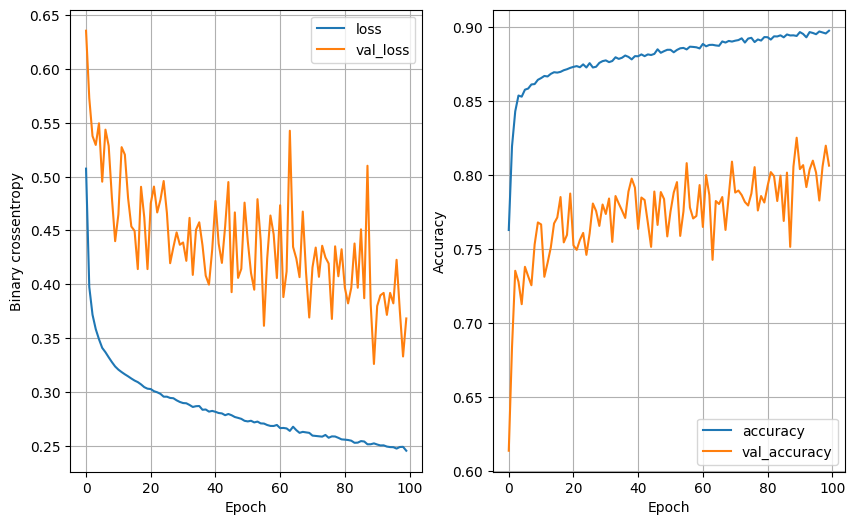

119/119 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8722
64 nodes,dropout 0.2,lr 0.1,batch size 32


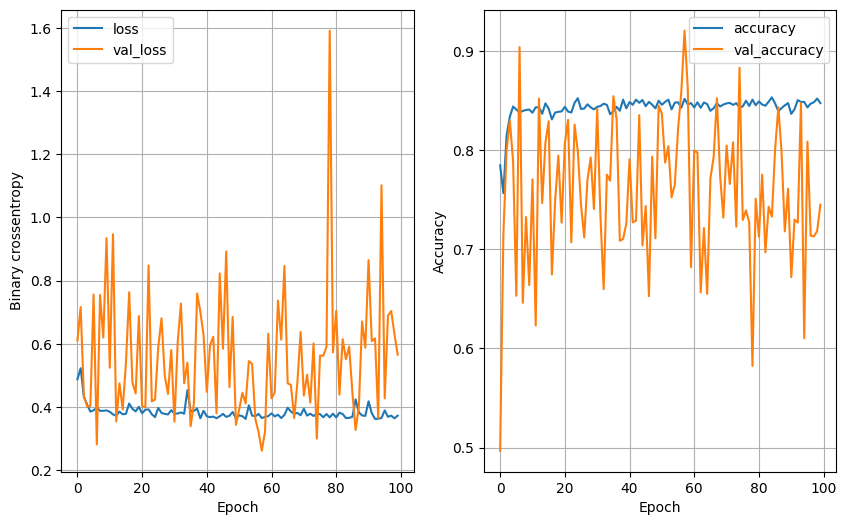

119/119 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8709
64 nodes,dropout 0.2,lr 0.1,batch size 64


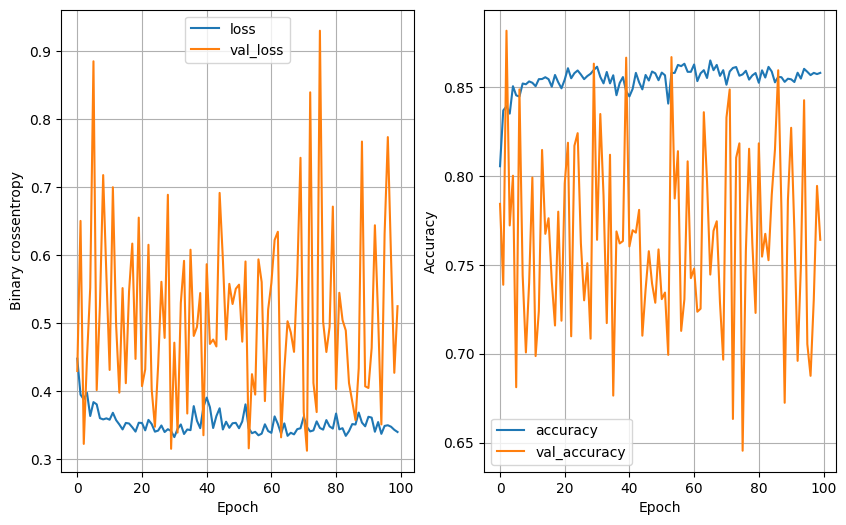

119/119 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8675
64 nodes,dropout 0.2,lr 0.1,batch size 128


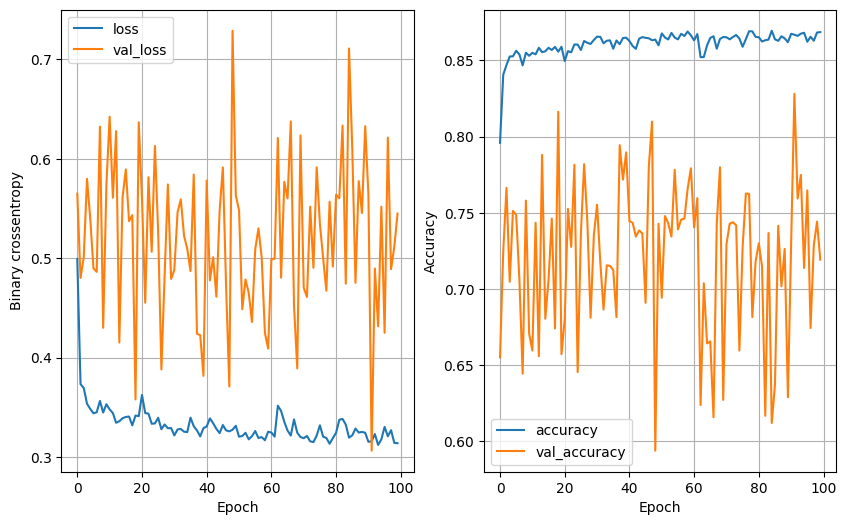

119/119 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8691
64 nodes,dropout 0.2,lr 0.005,batch size 32


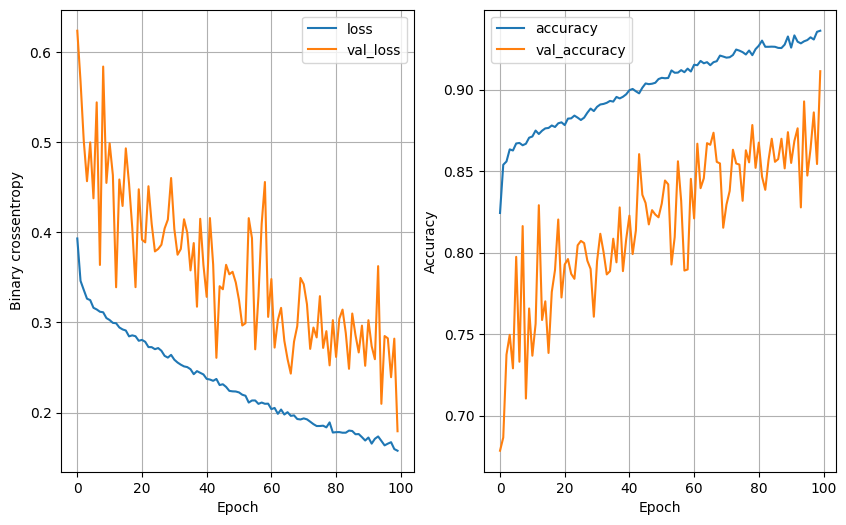

119/119 [==============================] - 0s 2ms/step - loss: 0.6465 - accuracy: 0.8336
64 nodes,dropout 0.2,lr 0.005,batch size 64


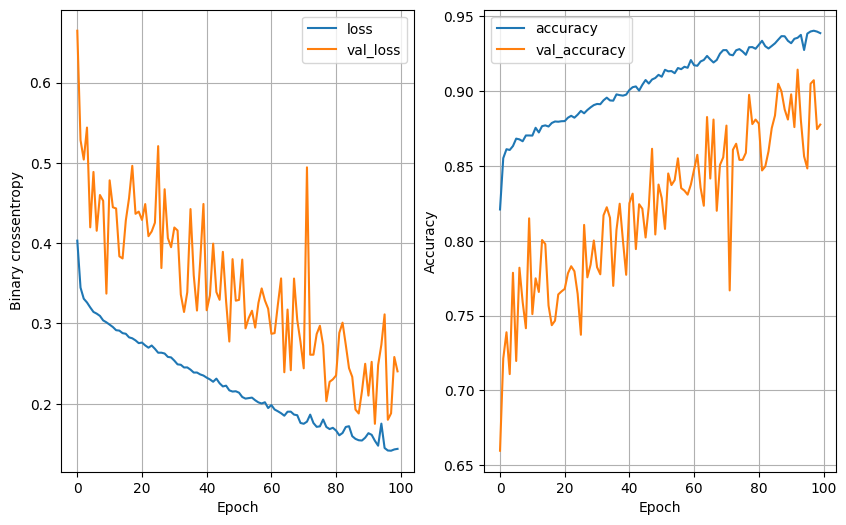

119/119 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.8562
64 nodes,dropout 0.2,lr 0.005,batch size 128


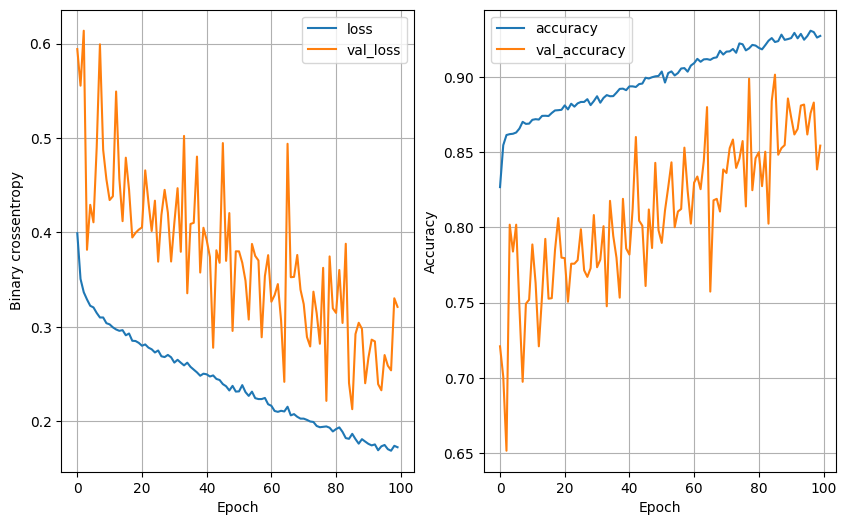

119/119 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.8557
64 nodes,dropout 0.2,lr 0.001,batch size 32


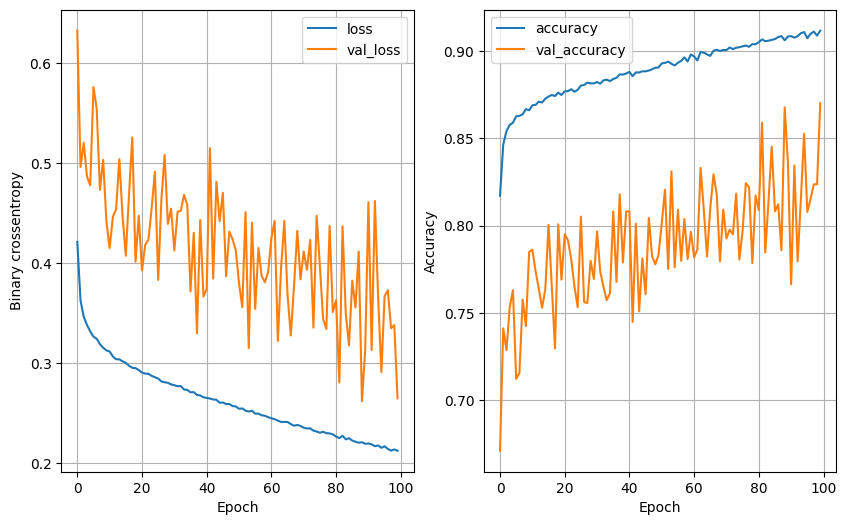

119/119 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8638
64 nodes,dropout 0.2,lr 0.001,batch size 64


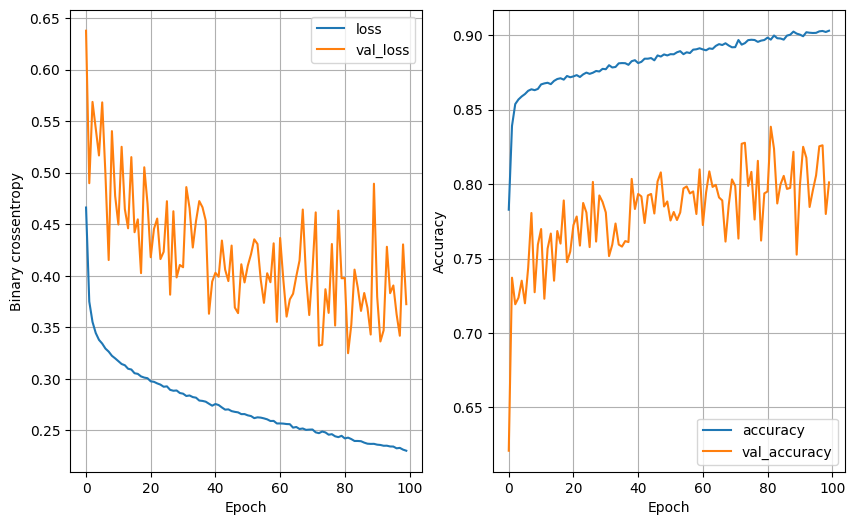

119/119 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8696
64 nodes,dropout 0.2,lr 0.001,batch size 128


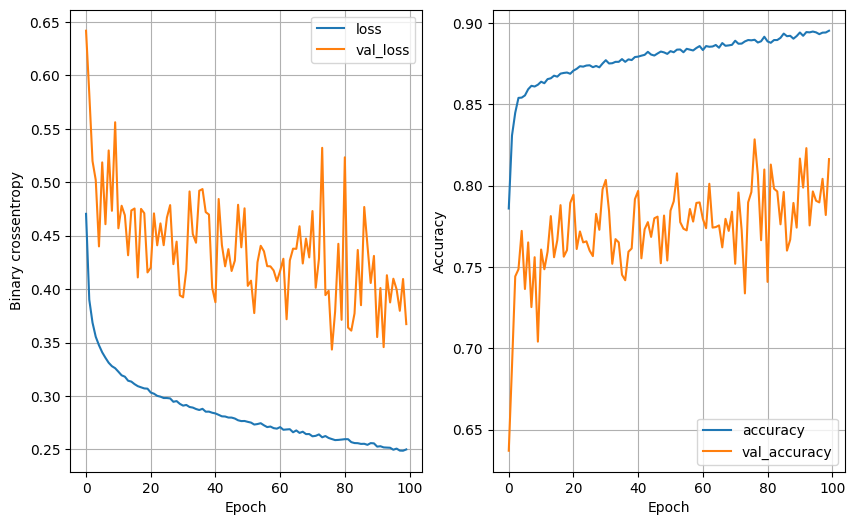

119/119 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8720


In [142]:
least_val_loss=float('inf')
least_loss_model=None
epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.1,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes,dropout {dropout_prob},lr {lr},batch size {batch_size}")
                model, history=train_model(x_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss=model.evaluate(x_valid,y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss=val_loss
                    least_loss_model=model
                    

In [153]:
y_pred=least_loss_model.predict(x_test)
y_pred=(y_pred>0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 0s 3ms/step


array([1, 1, 0, ..., 0, 1, 0])

In [155]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81      1361
           1       0.87      0.94      0.90      2443

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



Regression fcc-bikes regression


In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [265]:
dataset_cols=["bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional",]
df=pd.read_csv("./DataSets/ForML/SeoulBikeData.csv").drop(["Date","Seasons","Holiday"],axis=1)


In [266]:
df.columns=dataset_cols
df.head()

bike_count  hour  temp  humidity  wind  visibility  dew_pt_temp  radiation   
0         254     0  -5.2        37   2.2        2000        -17.6        0.0  \
1         204     1  -5.5        38   0.8        2000        -17.6        0.0   
2         173     2  -6.0        39   1.0        2000        -17.7        0.0   
3         107     3  -6.2        40   0.9        2000        -17.6        0.0   
4          78     4  -6.0        36   2.3        2000        -18.6        0.0   

   rain  snow functional  
0   0.0   0.0        Yes  
1   0.0   0.0        Yes  
2   0.0   0.0        Yes  
3   0.0   0.0        Yes  
4   0.0   0.0        Yes

In [267]:
df["functional"]=(df["functional"]=="Yes").astype(int)
df.head()

bike_count  hour  temp  humidity  wind  visibility  dew_pt_temp  radiation   
0         254     0  -5.2        37   2.2        2000        -17.6        0.0  \
1         204     1  -5.5        38   0.8        2000        -17.6        0.0   
2         173     2  -6.0        39   1.0        2000        -17.7        0.0   
3         107     3  -6.2        40   0.9        2000        -17.6        0.0   
4          78     4  -6.0        36   2.3        2000        -18.6        0.0   

   rain  snow  functional  
0   0.0   0.0           1  
1   0.0   0.0           1  
2   0.0   0.0           1  
3   0.0   0.0           1  
4   0.0   0.0           1

In [268]:
df=df[df["hour"]==12]
df=df.drop(["hour"],axis=1)

In [269]:
df.head()

bike_count  temp  humidity  wind  visibility  dew_pt_temp  radiation   
12          449   1.7        23   1.4        2000        -17.2       1.11  \
36          479   4.3        41   1.3        1666         -7.8       1.09   
60          333   5.8        85   1.7         349          3.4       0.43   
84          393  -0.3        38   4.8        1823        -12.9       1.11   
108         321  -2.3        25   0.0        1962        -19.7       0.00   

     rain  snow  functional  
12    0.0   0.0           1  
36    0.0   0.0           1  
60    0.0   0.0           1  
84    0.0   0.0           1  
108   0.0   0.0           1

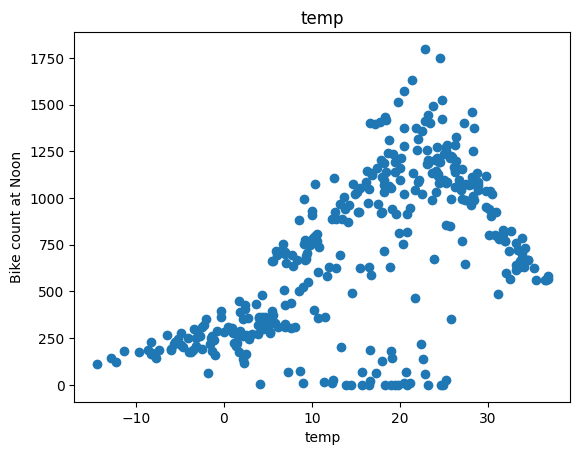

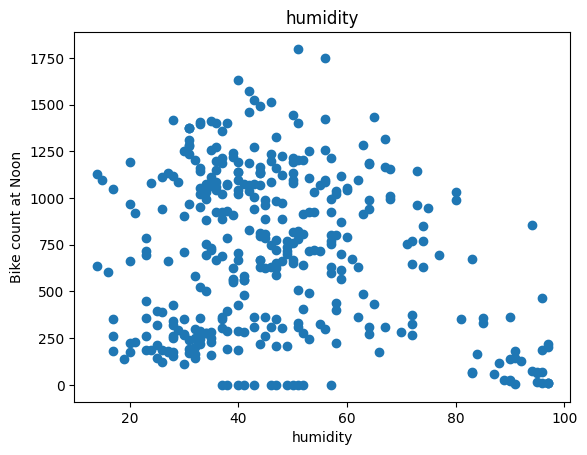

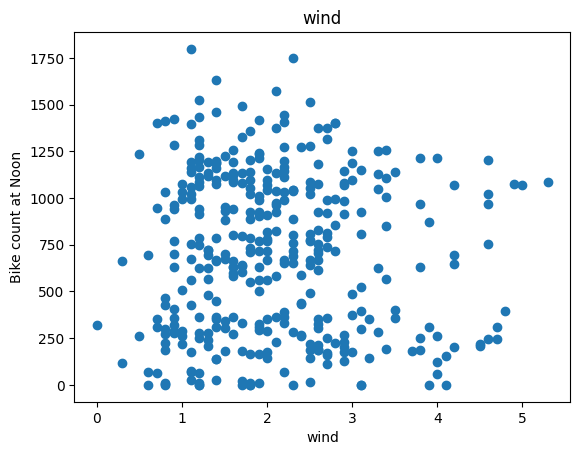

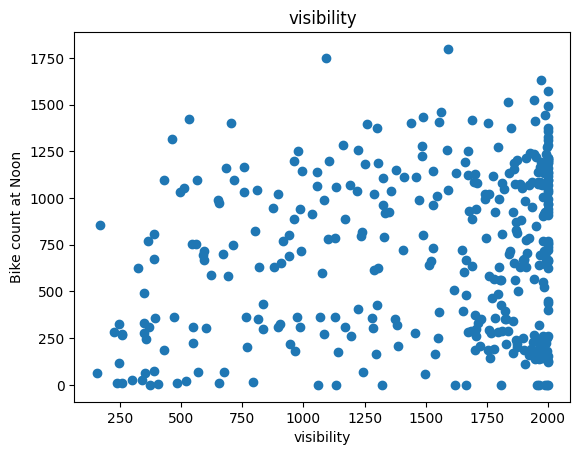

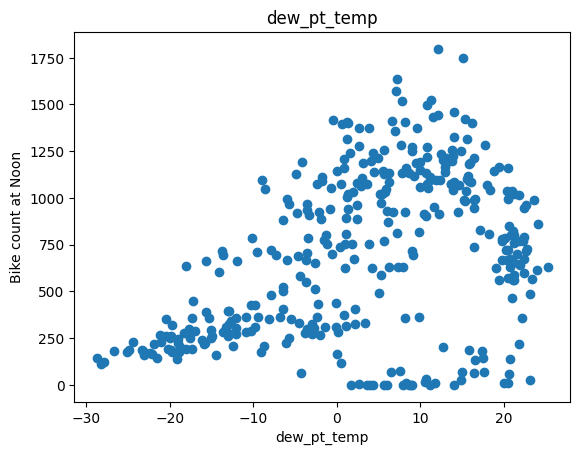

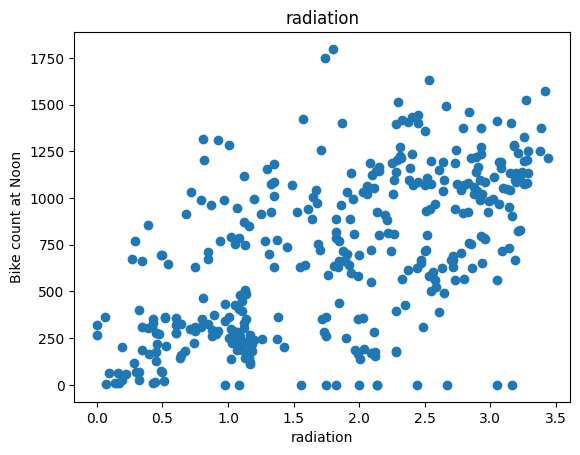

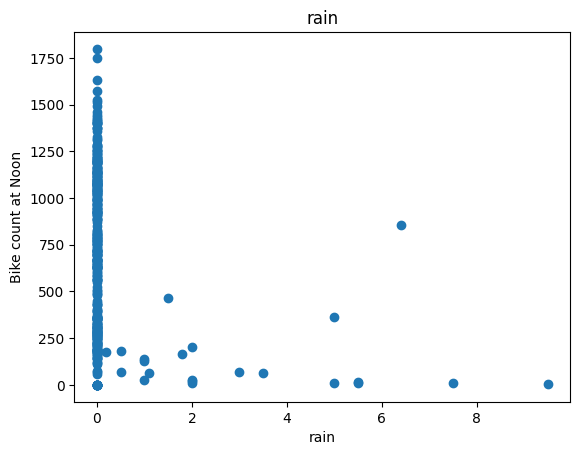

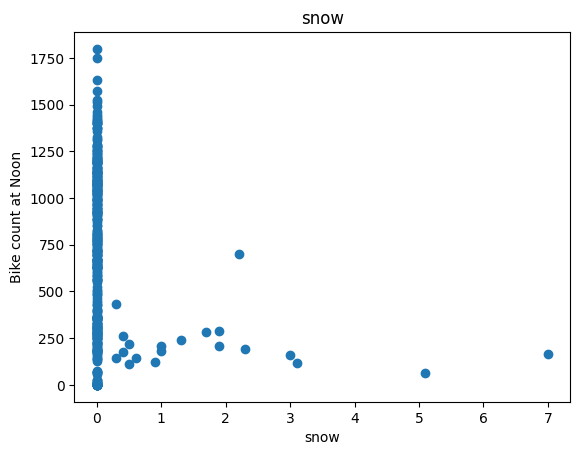

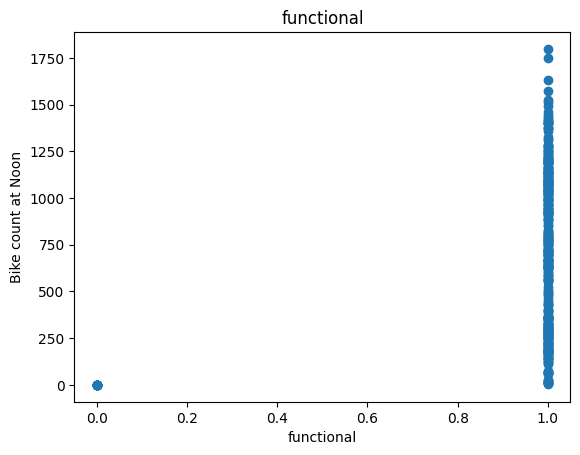

In [270]:
for label in df.columns[1:]:
    plt.scatter(df[label],df["bike_count"])
    plt.title(label)
    plt.ylabel("Bike count at Noon")
    plt.xlabel(label)
    plt.show()

In [271]:
df=df.drop(["wind","visibility","functional"],axis=1)
df.head()

bike_count  temp  humidity  dew_pt_temp  radiation  rain  snow
12          449   1.7        23        -17.2       1.11   0.0   0.0
36          479   4.3        41         -7.8       1.09   0.0   0.0
60          333   5.8        85          3.4       0.43   0.0   0.0
84          393  -0.3        38        -12.9       1.11   0.0   0.0
108         321  -2.3        25        -19.7       0.00   0.0   0.0

#Train /Validate /Test Datasets

In [272]:
train,val,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])
def get_xy(dataframe,y_label,x_label=None):
    dataframe=copy.deepcopy(dataframe)
    if x_label is None:
        x=dataframe[[c for c in dataframe.columns if c!=y_label]].values
    else:
        if len(x_label)==1:
            x=dataframe[x_label[0]].values.reshape(-1,1)
        else:
            x=dataframe[x_label].values
    y=dataframe[y_label].values.reshape(-1,1)
    data=np.hstack((x,y))
    return data,x,y


In [273]:
_,x_train_temp,y_train_temp=get_xy(train,"bike_count",x_label=["temp"])
_,x_val_temp,y_val_temp=get_xy(val,"bike_count",x_label=["temp"])
_,x_test_temp,y_test_temp=get_xy(test,"bike_count",x_label=["temp"])


In [274]:
temp_reg=LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [275]:
print(temp_reg.coef_,temp_reg.intercept_)

[[21.50215536]] [375.94952168]


In [276]:
temp_reg.score(x_test_temp,y_test_temp)

0.21191016934420637

ValueError: x and y must be the same size

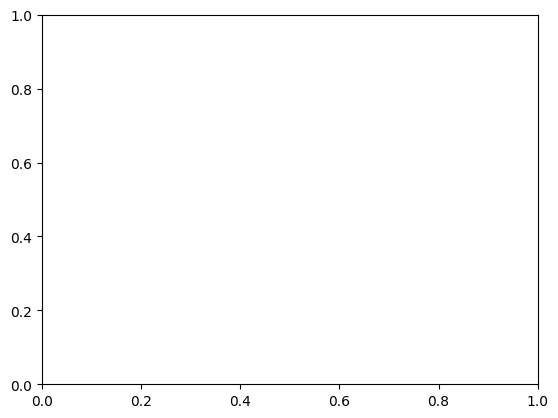

In [291]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()


Multiple LinearRegression

In [277]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [278]:
_,x_train_temp,y_train_temp=get_xy(train,"bike_count",x_label=df.columns[1:])
_,x_val_temp,y_val_temp=get_xy(val,"bike_count",x_label=df.columns[1:])
_,x_test_temp,y_test_temp=get_xy(test,"bike_count",x_label=df.columns[1:])